# Using the spectral library

--------------------------------------------------------------------------------
--- Description of libraries
--------------------------------------------------------------------------------
Key         :  A
Description :  solar metallicity, 3800-11000 A, Teff = 3500-20000 K, logg = 0-5
--------------------------------------------------------------------------------
Model filename:  diskint_teff_5750_logg_45_p00.fits.gz


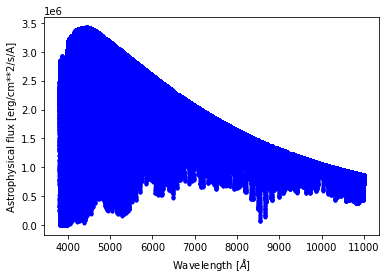

In [1]:
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl
import os

sl = pyasl.SpectralLib()

# List available libraries
sl.listDescription()

# Disk-integrated spectrum for Teff, logg, and metallicty
sdifn = sl.requestModel(5750, 4.5, 0.0, nex="diskint")

print("Model filename: ", os.path.basename(sdifn))

w, f = sl.read1dFitsSpec(sdifn)

plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Astrophysical flux [erg/cm**2/s/A]")
plt.plot(w, f, 'b.-')
plt.show()

## Limb-angle resolved Halpha line

Available cos(theta) = mu angles:  [0.001 0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.   ]


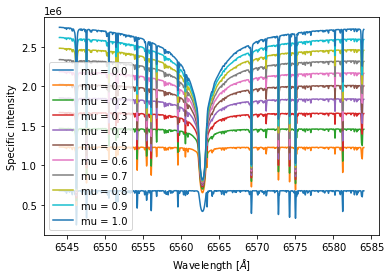

In [2]:
wlmin = 6564-20
wlmax = 6564+20
indi = (w > wlmin) & (w < wlmax)

# Specific intensity resolved w.r.t. viewing angle
# for Teff, logg, and metallicty
musfn = sl.requestModel(5750, 4.5, 0.0, nex="muspecs")

w, mus, intens = sl.readMuFits(musfn)

print("Available cos(theta) = mu angles: ", mus)

# Plot specific intensity
for i, mu in enumerate(mus):
    plt.plot(w[indi], intens[indi,i], label="mu = %3.1f" % mu)
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("Specific intensity")
plt.legend()
plt.show()

## Manuel disk integration

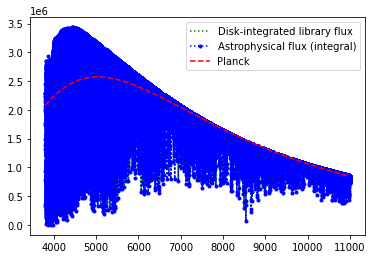

In [3]:
# Real (not astrophysical) flux
rf = np.zeros_like(w)

for i in range(len(mus)-1):
    # rf += I*mu*dmu
    rf += (intens[::,i]*mus[i] + intens[::,i+1]*mus[i+1])/2 * (mus[i+1] - mus[i])
rf *= 2*np.pi
# Astrophysical flux
af = rf/np.pi

plt.plot(w[::10], f[::10], 'g:', label="Disk-integrated library flux")
plt.plot(w[::10], af[::10], 'b.:', label="Astrophysical flux (integral)")
plt.plot(w[::10], pyasl.planck(5750, w[::10]*1e-10)*1e-7/np.pi, 'r--', label="Planck") 
plt.legend()
plt.show()

## Listing available content

In [4]:
sl.listInventory()

--------------------------------------------------------------------------------
--- Inventory
--------------------------------------------------------------------------------
(10000.0, 2.0, 0.0, 'diskint') diskint_teff_10000_logg_20_p00.fits.gz
(10000.0, 3.0, 0.0, 'diskint') diskint_teff_10000_logg_30_p00.fits.gz
(10000.0, 3.5, 0.0, 'diskint') diskint_teff_10000_logg_35_p00.fits.gz
(10000.0, 4.0, 0.0, 'diskint') diskint_teff_10000_logg_40_p00.fits.gz
(10000.0, 4.5, 0.0, 'diskint') diskint_teff_10000_logg_45_p00.fits.gz
(10000.0, 5.0, 0.0, 'diskint') diskint_teff_10000_logg_50_p00.fits.gz
(12000.0, 3.0, 0.0, 'diskint') diskint_teff_12000_logg_30_p00.fits.gz
(12000.0, 3.5, 0.0, 'diskint') diskint_teff_12000_logg_35_p00.fits.gz
(12000.0, 4.0, 0.0, 'diskint') diskint_teff_12000_logg_40_p00.fits.gz
(12000.0, 4.5, 0.0, 'diskint') diskint_teff_12000_logg_45_p00.fits.gz
(12000.0, 5.0, 0.0, 'diskint') diskint_teff_12000_logg_50_p00.fits.gz
(15000.0, 3.0, 0.0, 'diskint') diskint_teff_15000_logg